<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Census-Income-Data-Set" data-toc-modified-id="Census-Income-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Census Income Data Set</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#data-types" data-toc-modified-id="data-types-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>data types</a></span></li><li><span><a href="#missing-values" data-toc-modified-id="missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>missing values</a></span></li><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Categorical columns</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Bivariate-analysis" data-toc-modified-id="Bivariate-analysis-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Bivariate analysis</a></span></li><li><span><a href="#Two-sampled-T-test-for-two-continuos-variables" data-toc-modified-id="Two-sampled-T-test-for-two-continuos-variables-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Two sampled T-test for two continuos variables</a></span></li><li><span><a href="#Chi-square-goodness-of-fit-for-two-categorical-data" data-toc-modified-id="Chi-square-goodness-of-fit-for-two-categorical-data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Chi-square goodness of fit for two categorical data</a></span></li><li><span><a href="#Some-multivariate-relationships" data-toc-modified-id="Some-multivariate-relationships-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Some multivariate relationships</a></span><ul class="toc-item"><li><span><a href="#Correlation-among-the-numeric-variables." data-toc-modified-id="Correlation-among-the-numeric-variables.-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Correlation among the numeric variables.</a></span></li></ul></li></ul></li></ul></div>

# Census Income Data Set


**Categorical Attributes**

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
- sex: Female, Male.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

**Continuous Attributes**

- age: continuous.
Age of an individual
- fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous. Individual's working hour per week

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [2]:
# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 50) # None for all the rows
pd.set_option('display.max_colwidth', 50)

In [3]:
import os
import time

import warnings
warnings.filterwarnings("ignore")

In [4]:
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

# Load the data

In [5]:
!head adult.csv

In [6]:
df = pd.read_csv('adult.csv')
print(df.shape)

df.head().append(df.tail())

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Data Cleaning

## data types

In [7]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
df.head()\
.append(df.dtypes,ignore_index=True)\
.append(df.select_dtypes('object').apply(pd.Series.nunique),
                                                    ignore_index=True)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,object
6,NaN,9.00,NaN,16.00,NaN,7.00,15.00,6.00,5.00,2.00,NaN,NaN,NaN,42.00,2.00


In [9]:
df.dtypes.value_counts()

object    9
int64     6
dtype: int64

In [10]:
df.select_dtypes('object').apply(pd.Series.nunique)

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
income             2
dtype: int64

## missing values

In [11]:
df.iloc[:10]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df[df['workclass'] == '?'].head(2)\
.append(df[df['occupation'] == '?'].head(2))\
.append(df[df['native-country'] == '?'].head(2))


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K


In [14]:
df.columns[df.isin(['?']).any()]

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [15]:
null_cols = df.columns[df.isin(['?']).any()]
df[null_cols].isin(['?']).sum()

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [16]:
df[null_cols].isin(['?']).sum() / df[null_cols].shape[0] * 100

workclass        5.73
occupation       5.75
native-country   1.75
dtype: float64

In [17]:
pd.concat([df[null_cols].isin(['?']).sum(),
           df[null_cols].isin(['?']).sum() / df[null_cols].shape[0] * 100 ],
         axis=1)

# about 6% values have nans

,0,1
workclass,2799,5.73
occupation,2809,5.75
native-country,857,1.75


In [18]:
df[null_cols].mode()

,workclass,occupation,native-country
0,Private,Prof-specialty,United-States


In [19]:
# missing values imputation by mode

In [20]:
df.loc[df['workclass'] == '?', 'workclass'] = df['workclass'].mode().values[0]
df.loc[df['occupation'] == '?', 'occupation'] = df['occupation'].mode().values[0]
df.loc[df['native-country'] == '?', 'native-country'] = df['native-country'].mode().values[0]

In [21]:
with pd.option_context('display.max_colwidth', 500):
    display(df.select_dtypes('object').apply(lambda x: str(pd.Series.unique(x).tolist()) ).to_frame())

,0
workclass,"['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']"
education,"['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']"
marital-status,"['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']"
occupation,"['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 'Other-service', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']"
relationship,"['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative']"
race,"['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']"
gender,"['Male', 'Female']"
native-country,"['United-States', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal', 'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands']"
income,"['<=50K', '>50K']"


In [22]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Categorical columns

In [23]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [24]:
# do not run this cell twice, incomes becomes all nans
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


# Summary

In [28]:
df_num = df.drop(["educational-num","income"], axis=1)
df_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,"48,842.00","48,842.00","48,842.00","48,842.00","48,842.00"
mean,38.64,"189,664.13","1,079.07",87.50,40.42
std,13.71,"105,604.03","7,452.02",403.00,12.39
min,17.00,"12,285.00",0.00,0.00,1.00
25%,28.00,"117,550.50",0.00,0.00,40.00
50%,37.00,"178,144.50",0.00,0.00,40.00
75%,48.00,"237,642.00",0.00,0.00,45.00
max,90.00,"1,490,400.00","99,999.00","4,356.00",99.00


In [30]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


# EDA

## Univariate analysis

In [32]:
df.select_dtypes('number').columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

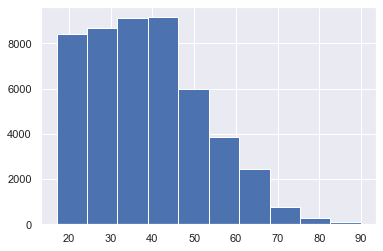

In [33]:
df['age'].hist()

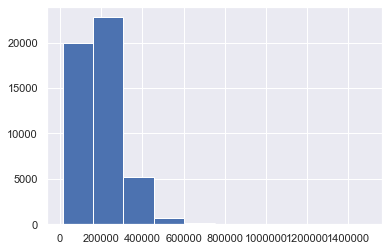

In [35]:
df['fnlwgt'].hist() # right skewed

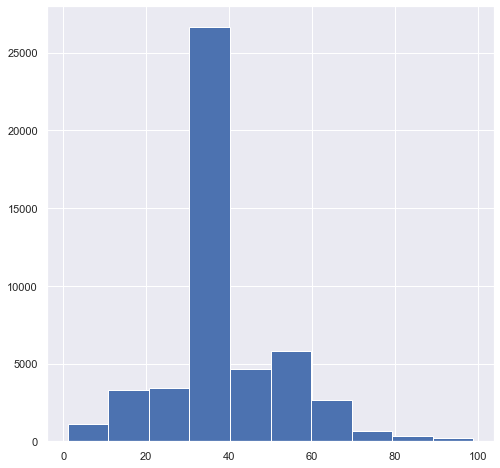

In [36]:
df['hours-per-week'].hist(figsize=(8,8))

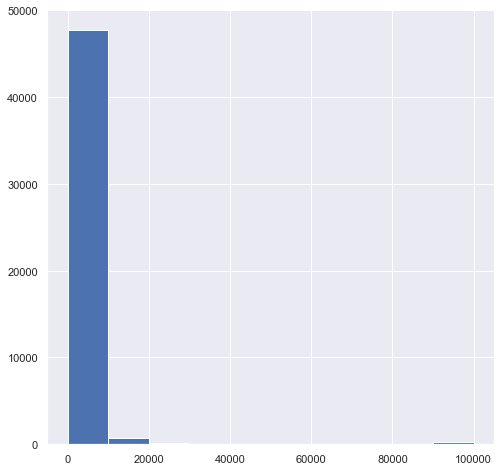

In [37]:
df["capital-gain"].hist(figsize=(8,8))

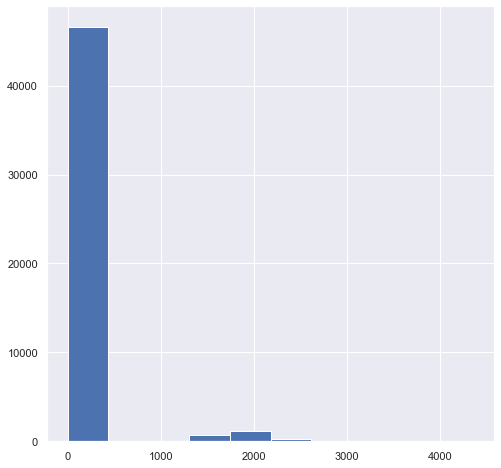

In [38]:
df["capital-loss"].hist(figsize=(8,8))

In [39]:
df[df["capital-loss"]>0].shape

(2282, 15)

In [40]:
df.shape

(48842, 15)

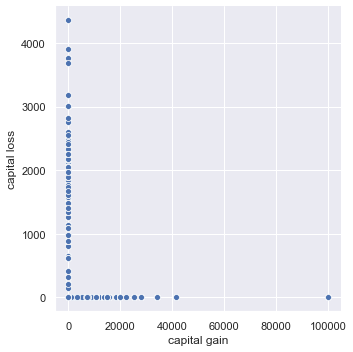

In [41]:
sns.relplot('capital-gain','capital-loss', data= df)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

In [96]:
def count_plot(df, col, agg=True):
    """count plot of given column against given target column.
    
    """
    plt.figure(figsize=(20,8))
    total = float(len(df['income']) )

    ax = sns.countplot(x=col, data=df)
    for p in ax.patches:
        xp = p.get_x()+p.get_width()/2.
        height = p.get_height()
        yp = height + 3
        
        txt = '{:1.2f}'.format((height/total)*100)
        
        if agg:
            txt = '{:d} ({:1.2f}%)'.format(height, (height/total)*100)
        ax.text(xp,yp,txt, ha="center", fontsize=16)
        
    plt.xticks(fontsize=18,rotation=90)
    plt.yticks(fontsize=18)
    plt.xlabel(col, fontsize=24)
    plt.ylabel('count', fontsize=24)
    plt.show()

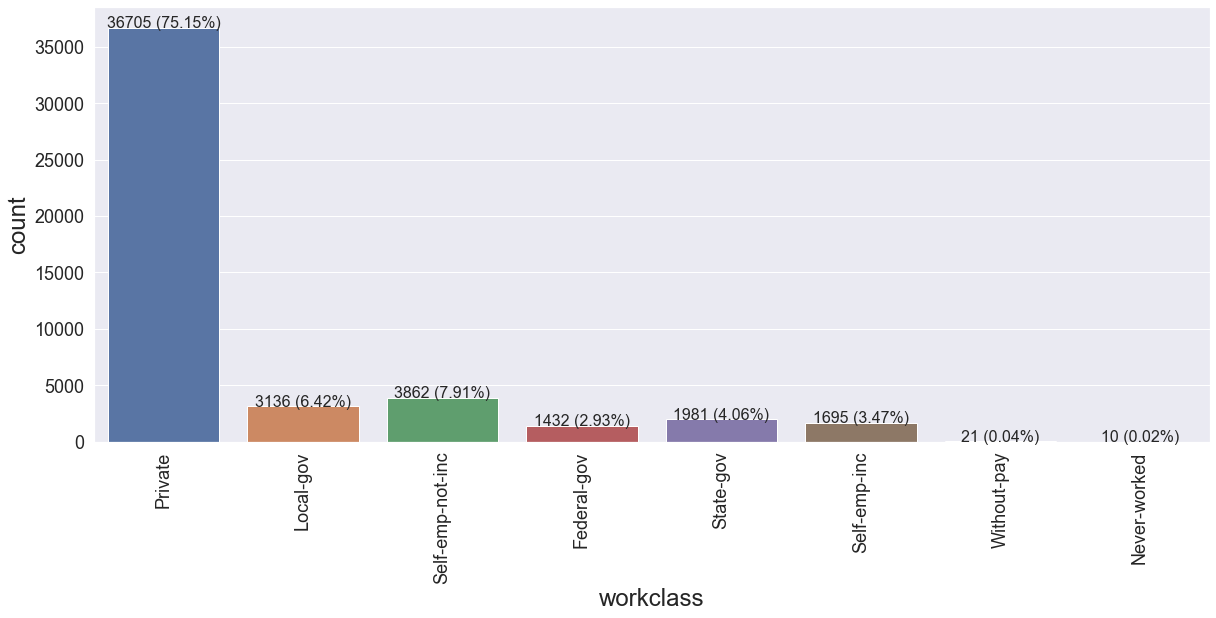

In [97]:
count_plot(df, 'workclass')

In [84]:
# count_plot(df, 'education')

In [85]:
# count_plot(df, 'marital-status')

In [86]:
# count_plot(df, 'occupation')

In [83]:
# count_plot(df, 'relationship')

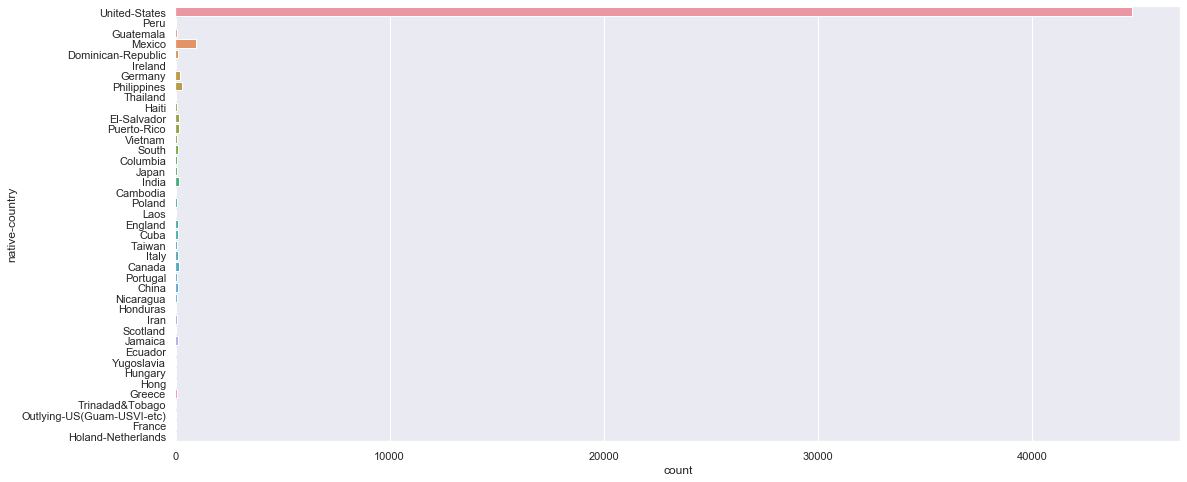

In [89]:
plt.figure(figsize=(18,8))

ax = sns.countplot(y="native-country", data=df)

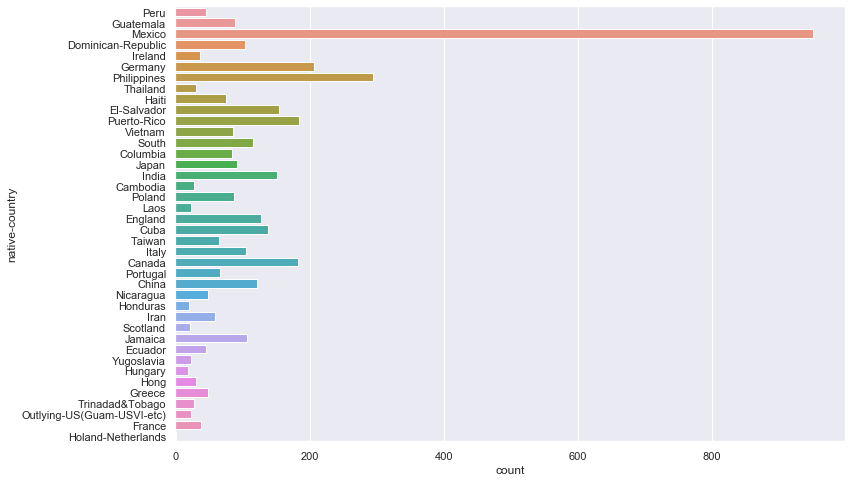

In [92]:
plt.figure( figsize=(12,8))
sns.countplot(y="native-country", data=df[df['native-country'] != 'United-States'])

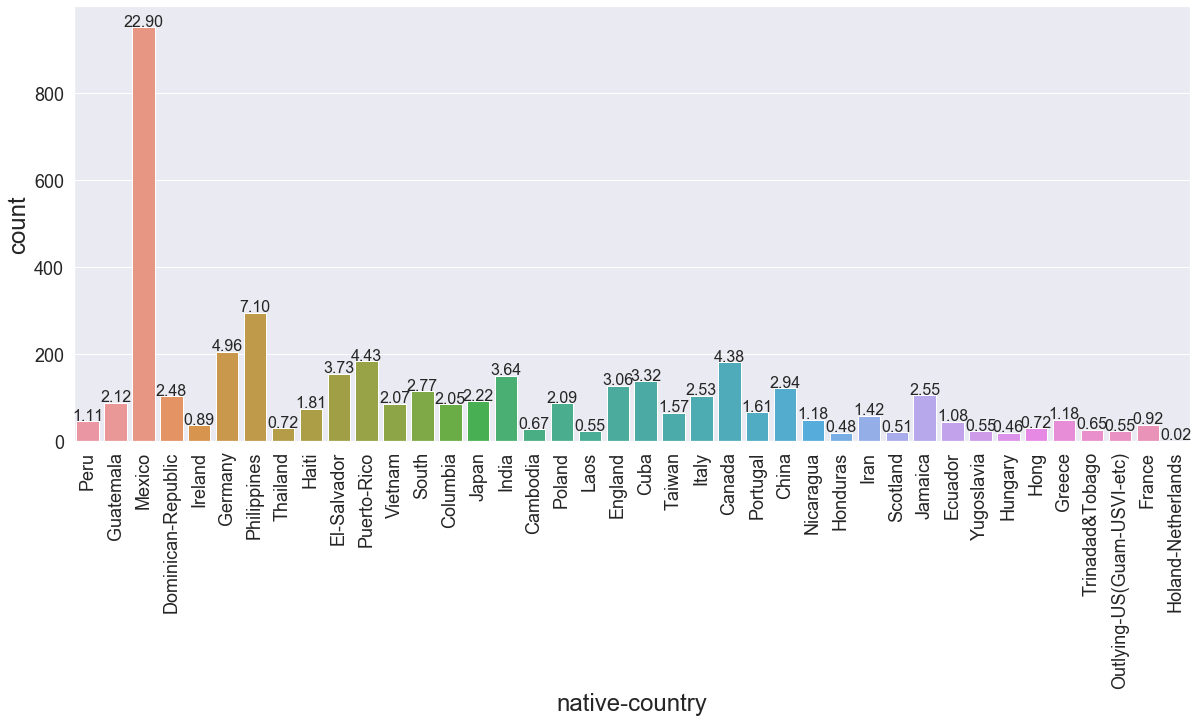

In [98]:
count_plot(df[df['native-country'] != 'United-States'], 'native-country', False)

## Bivariate analysis

In [101]:
df[['income','age']].groupby('income').mean() # income 0 means group <=50k

,age
income,
0,36.87
1,44.28


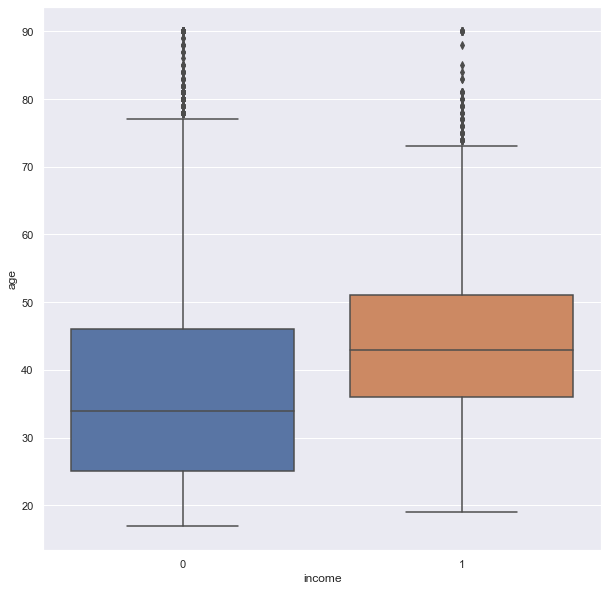

In [99]:
fig = plt.figure(figsize=(10,10)) 
ax = sns.boxplot(x="income", y="age", data=df)
plt.show()

## Two sampled T-test for two continuos variables
- Null Hypothesis :- there is no difference in Mean age of income group >50k and income group <=50k.
- Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.

In [103]:
import random

df = df[(np.abs(stats.zscore(df["age"])) < 3)] # exclude outliers of 3 sigma

income_1 = df[df['income']==1]['age']
income_0 = df[df['income']==0]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [104]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")


ttest 3.9182403478713907
p value 0.0001257959459678442
we reject null hypothesis


We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
It means that age has some contribution to the distinguish income groups.

## Chi-square goodness of fit for two categorical data

Chi-square goodness of fit

A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from hypothesized proportions. The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution.

For example, let’s suppose that we believe that the general population consists of 70% private workclass, 10% local-gov, 10% self-emp-not-inc and 10% self-emp-inc. We want to test whether the observed proportions from our sample differ significantly from these hypothesized proportions.

In [105]:
# contingency table

sample_category_data = df['workclass'].sample(frac=0.002,replace=True,random_state=0)
sample_cont_data = df['income'].sample(frac=0.002, replace=True, random_state=0)

c_t = pd.crosstab(sample_category_data, sample_cont_data,margins = False) 
c_t

income,0,1
workclass,,
Federal-gov,1,1
Local-gov,5,4
Private,55,15
Self-emp-inc,0,2
Self-emp-not-inc,9,1
State-gov,3,1


The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in workclass depend on income, or are they independent?

This is challenging to determine from the table alone; instead, we can use a statistical method called the Pearson’s Chi-Squared test.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

> If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.

> If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
  Here, In this example

- H0(Null Hypothesis) : There is no relationship between workclass and income.
- H1(Alternate Hypothesis) : There is a relationship between workclass and income.

In [106]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.0691086442807162
[[ 1.50515464  0.49484536]
 [ 6.77319588  2.22680412]
 [52.68041237 17.31958763]
 [ 1.50515464  0.49484536]
 [ 7.5257732   2.4742268 ]
 [ 3.01030928  0.98969072]]
probability=0.950, critical=11.070, stat=10.225
Independent (fail to reject H0)


With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "workclass" attribute on the target variable "income

## Some multivariate relationships

### Correlation among the numeric variables.

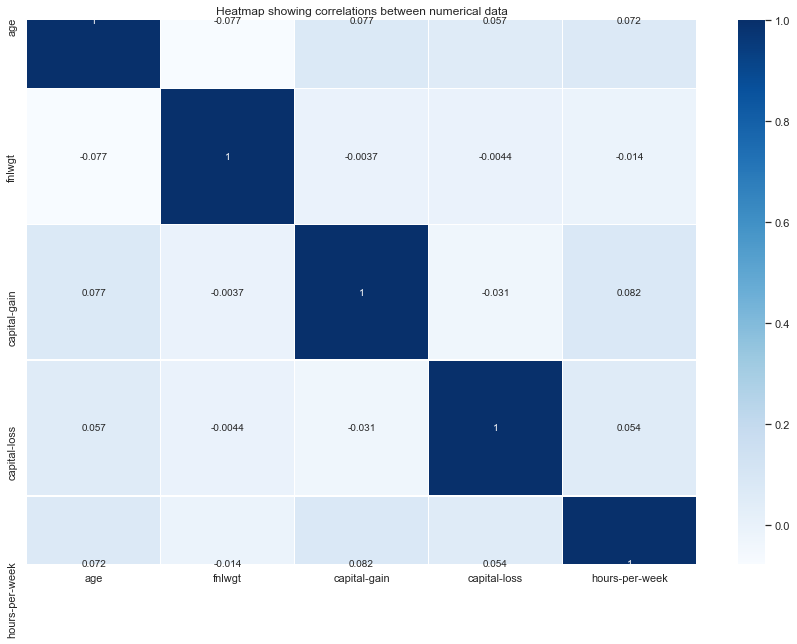

In [108]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [109]:
# Multivariate Analysis between "income", "hours-per-week", "gender"

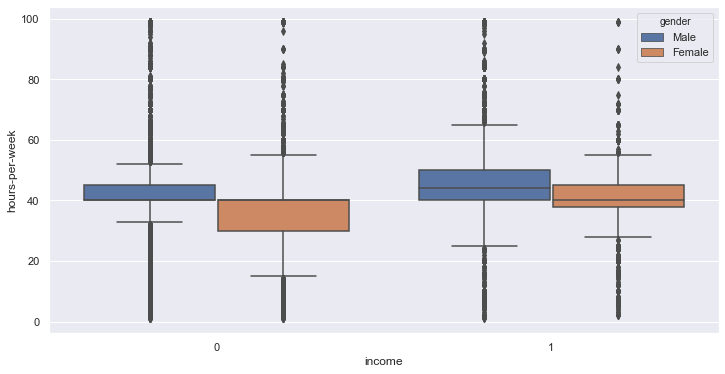

In [111]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=df)
plt.show()